In [1]:
import numpy as np
import qutip

def qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist):
    # operators and the hamiltonian
    sx = qutip.sigmax()
    sy = qutip.sigmay()
    sz = qutip.sigmaz()
    sm = qutip.sigmam()
    H = w * (np.cos(theta) * sz + np.sin(theta) * sx)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0: c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = qutip.mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])
    return output.expect[0], output.expect[1], output.expect[2]

## calculate the dynamics
w     = 1.0 * 2 * np.pi  # qubit angular frequency
theta = 0.2 * np.pi      # qubit angle from sigma_z axis (toward sigma_x axis)
gamma1 = 0.5             # qubit relaxation rate
gamma2 = 0.2             # qubit dephasing rate
# initial state
a = 1.0
psi0 = (a*qutip.basis(2, 0) + (1-a)*qutip.basis(2, 1))/np.sqrt(a**2 + (1-a)**2)
tlist = np.linspace(0, 4, 250)
#expectation values for ploting
sx, sy, sz = qubit_integrate(w, theta, gamma1, gamma2, psi0, tlist)

c:\Users\iks14535\AppData\Local\miniconda3\envs\ion-sim\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


c:\Users\iks14535\AppData\Local\miniconda3\envs\ion-sim\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


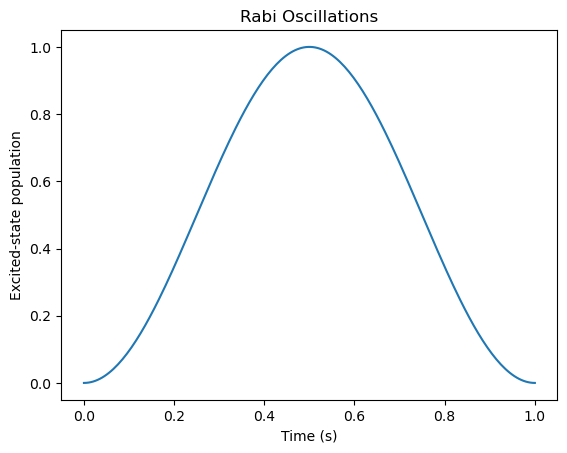

In [5]:
from qutip import basis, sigmax, mesolve
import numpy as np
import matplotlib.pyplot as plt

# 1) Define parameters
Ω = 2 * np.pi * 1.0      # Rabi frequency (rad/s)
H = 0.5 * Ω * sigmax()   # H = (Ω/2) σ_x

# 2) Initial state |0⟩ (ground state)
psi0 = basis(2, 0)

# 3) Time grid: one full Rabi period
T = 2 * np.pi / Ω
tlist = np.linspace(0, T, 200)

# 4) Solve Schrödinger equation (no dissipation)
#    We track P_excited = ⟨1|ρ|1⟩
proj_exc = basis(2,1) * basis(2,1).dag()
result = mesolve(H, psi0, tlist, [], [proj_exc])

# 5) Plot
plt.plot(tlist, result.expect[0])
plt.xlabel("Time (s)")
plt.ylabel("Excited-state population")
plt.title("Rabi Oscillations")
plt.show()


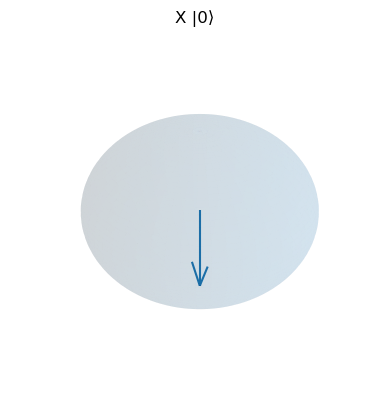

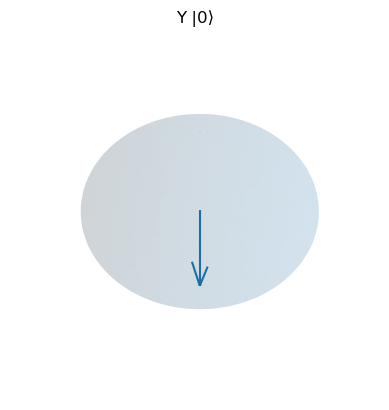

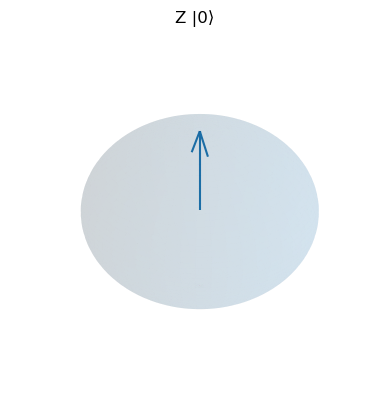

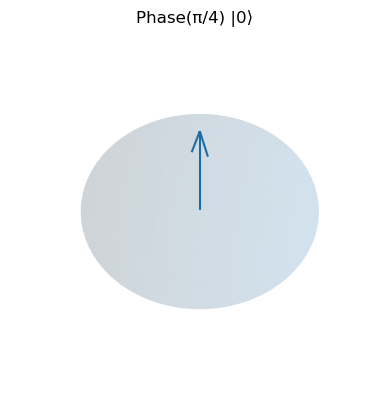

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]], dtype=complex)
sigma_y = np.array([[0, -1j], [1j, 0]], dtype=complex)
sigma_z = np.array([[1, 0], [0, -1]], dtype=complex)

# Define gates
X = sigma_x
Y = sigma_y
Z = sigma_z
def phase_gate(phi):
    return np.array([[1, 0], [0, np.exp(1j * phi)]], dtype=complex)

# Initial state |0>
psi0 = np.array([1, 0], dtype=complex)

# Apply gates
psi_X = X @ psi0
psi_Y = Y @ psi0
psi_Z = Z @ psi0
psi_P = phase_gate(np.pi/4) @ psi0

# Function to compute Bloch vector
def bloch_vector(psi):
    rho = np.outer(psi, np.conj(psi))
    x = np.real(np.trace(rho @ sigma_x))
    y = np.real(np.trace(rho @ sigma_y))
    z = np.real(np.trace(rho @ sigma_z))
    return np.array([x, y, z])

states = [psi_X, psi_Y, psi_Z, psi_P]
titles = ['X |0⟩', 'Y |0⟩', 'Z |0⟩', 'Phase(π/4) |0⟩']

# Sphere coordinates
phi, theta = np.mgrid[0.0:np.pi:100j, 0.0:2*np.pi:100j]
x_s = np.sin(phi) * np.cos(theta)
y_s = np.sin(phi) * np.sin(theta)
z_s = np.cos(phi)

for psi, title in zip(states, titles):
    vec = bloch_vector(psi)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x_s, y_s, z_s, alpha=0.1)
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], length=1.0)
    ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1]); ax.set_zlim([-1, 1])
    ax.set_title(title)
    ax.set_axis_off()
    plt.show()
